### PID Control

PID stands for Proportional-Integral-Derivative. It is a special type of closed loop control law that is widely used.

For an introduction to PID Control watch the following videos

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4Y7zG48uHRo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Control law for PID controller**  

$$ u(t) = K_p e(t) + K_i \int e(t) dt + K_d e'(t) = K_p(e(t) + \frac{1}{\tau_i}\int e(t) dt + \tau_d e'(t))$$

* $K_p$ is the proportional weight
* $K_i$ is the integral weight
* $K_d$ is the derivative weight
* $\tau_i$ is the integral time constant
* $\tau_d$ is the derivative time constant


Note, here $e(t)$ is the measured error between desired state and actual state. $u(t)$ is the **plant input** and also the **controller output**.

**Intuition behind the role of different components**

* **P (Proportional)** - In many simple situations, proportional control ensures that the desired state (set point) is asymptotically reached from the initial state. It deals with the knowledge of the present error.

* **I (Integral)** - Integral control takes into account the past errors and their duration of persistence, thus it plays an important role in reducing steady-state error in many situations. It deals with the knowledge of past errors.

* **D (Derivative)** - Derivative control takes into account the rate at which the error is decreasing, thus it plays an important role in preventing possible overshoot due to the integrator. It deals with the knowledge of future error change.

**Drawbacks of P**

* In the discrete-time version, the state can oscillate around a certain mean state which isn’t the set point.
* Not suitable in cases where a certain state needs to be maintained and external forces like gravity are present irrespective of the error.

**Drawbacks of I**
* The possibility of overshooting the desired state is high.
* In the case of actuator saturation, integral wind-up can occur.

**Drawbacks of D**
* High-frequency noise can make the derivative contribution higher than required.




### Continuous and discrete-time systems

- **Continuous-time systems** — Systems where the evolution of the state is considered for any time. <br>
  Example - $$\dot x = Ax$$

- **Discrete-time systems** — Systems where the evolution of the state is considered only at discrete time steps. <br>
  Example - (Discrete-time, linear system)  $$ x_{k + 1} = \tilde Ax_{k}$$
  Each time step $k$ is separated  $\Delta t \ge \epsilon > 0$


### Continuous and discrete-time systems

- **Continuous-time systems** — Systems where the evolution of the state is considered for any time. <br>
  Example - $$\dot x = Ax$$

- **Discrete-time systems** — Systems where the evolution of the state is considered only at discrete time steps. <br>
  Example - (Discrete-time, linear system)  $$ x_{k + 1} = \tilde Ax_{k}$$
  Each time step $k$ is separated  $\Delta t \ge \epsilon > 0$


### Continuous and discrete-time systems

- **Continuous-time systems** — Systems where the evolution of the state is considered for any time. <br>
  Example - $$\dot x = Ax$$

- **Discrete-time systems** — Systems where the evolution of the state is considered only at discrete time steps. <br>
  Example - (Discrete-time, linear system)  $$ x_{k + 1} = \tilde Ax_{k}$$
  Each time step $k$ is separated  $\Delta t \ge \epsilon > 0$


Here is a great example where PID Control is utilized in a spring-mass-damper system and the step responses in various cases are analyzed. You shall also get a sneak peek into PID Tuning as well.

[Introduction: PID Controller Design](https://ctms.engin.umich.edu/CTMS/index.php?example=Introduction&section=ControlPID)




Here is another great example where PID Control is utilized in a spring-mass-damper system and the step responses in various cases are analyzed. You shall also get a sneak peek into PID Tuning as well.

[Introduction: PID Controller Design](https://ctms.engin.umich.edu/CTMS/index.php?example=Introduction&section=ControlPID)



Lets do a cool exercise in PID control. You can experiment with different values of PID constants and see how the response of the system changes

My plant variable (PV) has to be set to the given set points.\
The plant follows the ODE :
 $$\dot{y}=\frac{1}{\tau_p}(-(y - 23.0) + K_p  u)$$

interactive(children=(FloatSlider(value=5.0, description='Kc', max=50.0, step=1.0), FloatSlider(value=5.0, des…

<function __main__.pidPlot(Kc, tauI, tauD)>

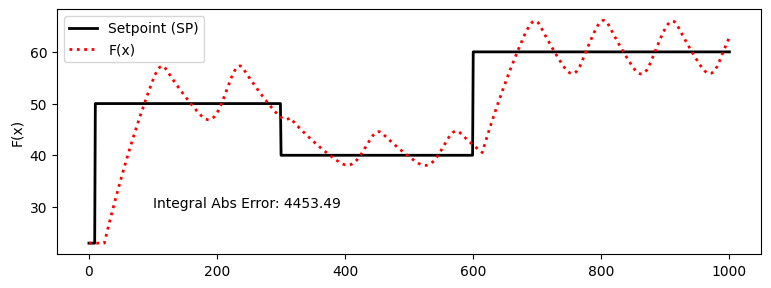

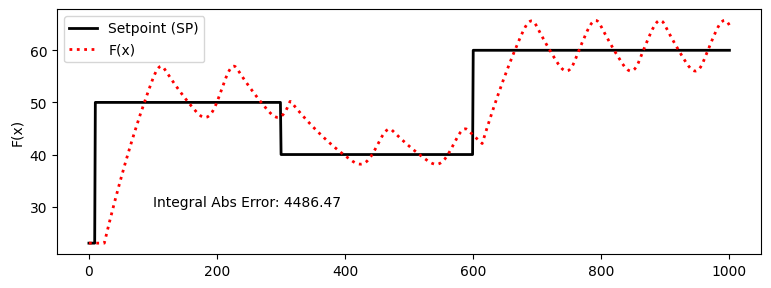

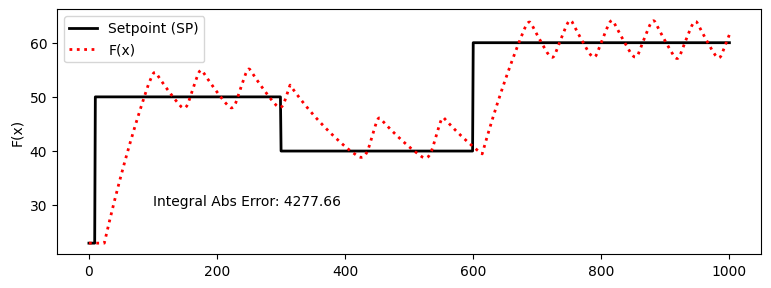

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as wg

n = 1001
tf = 1000.0

Kp = 0.9
tau_p = 175.0
theta_p = 15.0

def process(y,t,u):
    dydt = (1.0/tau_p) * (-(y - 23.0) + Kp * u)
    return dydt

def pidPlot(Kc,tauI,tauD):
    # initializing setpoints and PID parameters
    t = np.linspace(0,tf,n) # creates a numpy array where in time_final is divided in n intervals
    P = np.zeros(n)
    I = np.zeros(n)
    D = np.zeros(n)
    e = np.zeros(n)
    OP = np.zeros(n)
    PV = np.ones(n)*23.0  # plant variable
    SP = np.ones(n)*23.0
    SP[10:300] = 50.0
    SP[300:600] = 40.0
    SP[600:1001] = 60.0
    y0 = 23.0
    iae = 0.0

    # looping through all time steps
    for i in range(1, n):
        ts = [t[i - 1], t[i]]
        y = odeint(process, y0, ts, args=(OP[max(0, i - int(theta_p))], ))
        y0 = y[1]
        iae += np.abs(SP[i] - y0[0])
        # calculate new OP with PID
        PV[i] = y[1]
        e[i] = SP[i] - PV[i]
        dt = t[i] - t[i - 1]
        P[i] = Kc * e[i]
        I[i] = I[i - 1] + (Kc/tauI) * e[i] * dt
        D[i] = -Kc * tauD * (PV[i] - PV[i - 1])/dt
        OP[i] = P[i] + I[i] + D[i]
        if OP[i] >= 100:
            OP[i] = 100.0
            I[i] = I[i-1]
        if OP[i] <= 0:
            OP[i] = 0.0
            I[i] = I[i - 1]

    # plot PID response
    plt.figure(1, figsize=(20, 7))
    plt.subplot(2, 2, 1)
    plt.plot(t, SP, 'k-', linewidth=2, label='Setpoint (SP)')
    plt.plot(t, PV, 'r:', linewidth=2, label='F(x)')
    plt.ylabel('F(x)')
    plt.text(100, 30, 'Integral Abs Error: ' + str(np.round(iae, 2)))
    plt.legend(loc='best')

Kc_slide = wg.FloatSlider(value=5.0, min=0.0, max=50.0, step=1.0)
tauI_slide = wg.FloatSlider(value=5.0, min=5.0, max=180.0, step=5.0)
tauD_slide = wg.FloatSlider(value=0.0, min=0.0, max=20.0, step=1.0)
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide, tauD=tauD_slide)